# Introduction to Scikit-Learn(sklearn)

This notebook demonstrates some of the most useful function of the most useful function of the beautiful scikit-learn library.

What we ae going to cover = [

0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make prediction on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together! ]

In [1]:
# Lets listify the content
what_were_covering = [

"0. An end-to-end Scikit-Learn workflow",
"1. Getting the data ready",
"2. Choose the right estimator/algorithm for our problems",
"3. Fit the model/algorithm and use it to make prediction on our data",
"4. Evaluating a model",
"5. Improve a model",
"6. Save and load a trained model",
"7. Putting it all together!" ]

In [2]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make prediction on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

In [3]:
# Standard imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 0. An end-to-end Scikit-Learn workflow

In [4]:
import numpy as np

In [5]:
# 1. Get the data ready
import pandas as pd
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
# Create X (feature matrix)
X= heart_disease.drop("target", axis=1)

# Create y (labels)
y= heart_disease["target"]

In [7]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
# We'll keep the default hyperparameters
clf.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [8]:
# Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [9]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [10]:
# make a prediction
# y_label = clf.predict(np.array([0,2,3,4]))

In [11]:
y_preds = clf.predict(X_test)
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [12]:
y_test

54     1
51     1
246    0
108    1
110    1
      ..
56     1
105    1
152    1
116    1
223    0
Name: target, Length: 61, dtype: int64

In [13]:
# 4. Evaluate the model on the training and test data
clf.score(X_train, y_train)

1.0

In [14]:
clf.score(X_test, y_test)

0.8524590163934426

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82        24
           1       0.89      0.86      0.88        37

    accuracy                           0.85        61
   macro avg       0.84      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [16]:
confusion_matrix(y_test, y_preds)

array([[20,  4],
       [ 5, 32]], dtype=int64)

In [17]:
accuracy_score(y_test, y_preds)

0.8524590163934426

In [18]:
# 5. Improve a model
# Try diffent amount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test)* 100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 80.33%

Trying model with 20 estimators...
Model accuracy on test set: 83.61%

Trying model with 30 estimators...
Model accuracy on test set: 83.61%

Trying model with 40 estimators...
Model accuracy on test set: 88.52%

Trying model with 50 estimators...
Model accuracy on test set: 93.44%

Trying model with 60 estimators...
Model accuracy on test set: 83.61%

Trying model with 70 estimators...
Model accuracy on test set: 86.89%

Trying model with 80 estimators...
Model accuracy on test set: 86.89%

Trying model with 90 estimators...
Model accuracy on test set: 81.97%



In [19]:
# 6. Save a model and load it
import pickle

pickle.dump(clf,open("random_forest_model_1.pk1", "wb"))

In [20]:
loaded_model= pickle.load(open("random_forest_model_1.pk1","rb"))
loaded_model.score(X_test,y_test)

0.819672131147541

In [21]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make prediction on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

## 1. Getting our data ready to be used with machine learning

Three main  things we have to do:

    1. Split the data into features and labels(usually 'X' & 'y')
    2. Filling(also called imputing) or disregarding missing values
    3. Converting non-numerical values to numerical values( also known as feature encoding)

In [22]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [24]:
y= heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [25]:
# Split the data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2)

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [27]:
X.shape

(303, 13)

In [28]:
len(heart_disease)

303

## 1.1 Make sure it is all numerical

In [29]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [30]:
car_sales["Doors"].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [31]:
len(car_sales)

1000

In [32]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [33]:
# Split into X/y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Split into training and test set
X_train, X_test, y_train, y_test =train_test_split(X,
                                                  y,
                                                  test_size=0.2)

In [34]:
# Build machine learning models

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
# model.fit(X_train, y_train)
# model.score(X_test, y_test)

In [35]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer= ColumnTransformer([("one_hot",
                               one_hot,
                               categorical_features)],
                              remainder= "passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [36]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [37]:
dummies =pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [38]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                   y,
                                                   test_size=0.2)

model.fit(X_train, y_train)


RandomForestRegressor()

In [39]:
model.score(X_test, y_test)

0.3235867221569877

### 1.2 What if there were missing values?
1. Fill them with some values(also known as imputation).
2. Remove the samples with missing data all together

In [40]:
# Import car sales missing data
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [41]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [42]:
# Create X and Y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [43]:
# Convert our data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make','Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [44]:
car_sales_missing["Doors"].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

### Option 1: Fill missing data with Pandas

In [45]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the "Colour" column

car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)



In [46]:
# Check our dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [47]:
# Remove rows with missing Price value
car_sales_missing.dropna(inplace = True)


In [48]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [49]:
len(car_sales_missing)

950

In [50]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [51]:
# Convert our data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make','Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2: Fill missing values with scikit_learn


In [52]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [53]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [54]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace = True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [55]:
# Split into X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [56]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


# Fill Categorical values with "missing" and numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer= SimpleImputer(strategy="mean")

# Define column
cat_features =["Make", "Colour"]
door_feature =["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer ( something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [57]:
car_sales_filled = pd.DataFrame(filled_X,
                               columns=["Make","Colour", "Doors","Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [58]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [59]:
# Convert our data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make','Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [60]:
# Now we've got our data as numbers and filled( no missing values)
# Let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                   y,
                                                   test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.21990196728583944

In [61]:
len(car_sales_filled), len(car_sales)

(950, 1000)

In [62]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make prediction on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

## 2. Choosing the right estimator or model for our problem

Scikit-Learn uses estimator as another term for machine learning or algorithm.


* Classification: Predicting whether a sample is one thing or the other
* Regression: predicting a number

In [63]:
# 2.1 Picking a machine Learning model for regression problem
# from sklearn.datasets import load_boston
# boston = load_boston()
# boston




In [64]:
# data_url = "http://lib.stat.cmu.edu/datasets/boston"
# boston = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
# boston;

# data= np.hstack([boston.values[::2, :], boston.values[1::2, :2]])
# target = boston.values[1::2, 2]

# boston_df =  pd.DataFrame(boston["data"], columns=boston["feature_names"])
# boston_df["target"] = pd.Series(boston["target"])
# boston_df.head()


In [65]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load the California housing dataset
california = fetch_california_housing()

# Create a DataFrame
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['target'] = california.target

# Display the first few rows of the DataFrame
california_df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [66]:
# How many samples
len(california_df)

20640

In [67]:
# Let's try the ridge regresssion model
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
X = california_df.drop("target", axis =1)
y= california_df["target"]

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#Instantiate Ridge model
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the Ridge model on test data
model.score(X_test,y_test)

0.5758549611440125

In [68]:
# Let's try the Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = california_df.drop("target", axis=1)
y= california_df["target"]

# Split the data
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.2)

# Instantiate Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Evaluate the Random Forest
rf.score(X_test, y_test)



0.8065734772187598

### 2.2 Choosing and estimator for a classification

In [69]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [70]:
len(heart_disease)

303

Consulting the map and it says to try `LinearSVC`

In [71]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
X= heart_disease.drop("target", axis=1)
y= heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Instantiate LinearSVC
clf= LinearSVC()
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)

C:\Users\Esther Jokodola\anaconda3\envs\tensorflows\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [72]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [73]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X= heart_disease.drop("target", axis=1)
y= heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Instantiate Random Forest Classifier
clf= RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate the Random Forest Classifier
clf.score(X_test, y_test)

0.8524590163934426

Tidbit:
    
    1. If you have a stuctured data, use ensemble methods
    2. If you have unstuctured data use deep learning or transfer learning

## 3. Fit the model/algorithm on our data and use it to make prediction.

### 3.1 Fitting the model to the data

Different names for:
* `X` = features, feature variable, data
* `y` = labels, targets, target variables

In [74]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X= heart_disease.drop("target", axis=1)
y= heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Instantiate Random Forest Classifier
clf= RandomForestClassifier()

# Fit the model to the data(training the machine model)
clf.fit(X_train, y_train)

# Evaluate the Random Forest Classifier(Use the patterns that the model has learnt)
clf.score(X_test, y_test)

0.8524590163934426

In [75]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [76]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

### 3.2 Make prediction using machine learning model

2 ways to make prediction:
1. `predict()`
2. `predict_proba()`

In [77]:
# Use a trained model to make predictions
# clf.predict(np.array([1,7,4,6,2])) #this does not work

In [78]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [79]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [80]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [81]:
# Compare predictions to truth labels to evaluate model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [82]:
clf.score(X_test, y_test)

0.8524590163934426

In [83]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

Make prediction with `predict_proba()`

In [84]:
# predict_proba() returns probabilities of a classification model
clf.predict_proba(X_test[:5])


array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [85]:
# Let's predict() on the same data
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [86]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [87]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

`predict()` can also be used for regression

In [88]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = california_df.drop("target", axis =1)
y= california_df["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Instantiate and fit model
model = RandomForestRegressor().fit(X_train,y_train)

# Make predictions
y_preds = model.predict(X_test)

In [89]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [90]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [91]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

0.32659871732073664

## 4. Evaluating a machine learning machine

Three ways to evaluate Scikit-Learn model/estimators
1. Estimator `score` method
2. The `scoring` parameter
3. Problem specific metric functions.

### 4.1 Evaluating a model with the score method

In [92]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier()

In [93]:
clf.score(X_train, y_train)

1.0

In [94]:
clf.score(X_test, y_test)

0.8524590163934426

Let's do the same but for regression...

In [95]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = california_df.drop("target", axis =1)
y= california_df["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Instantiate and fit model
model = RandomForestRegressor().fit(X_train,y_train)


In [96]:
model.score(X_test, y_test)

0.8065734772187598

### 4.2 Evaluating a model using the `scoring` parameter

In [97]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier()

In [98]:
clf.score(X_test, y_test)

0.8524590163934426

In [99]:
cross_val_score(clf,X,y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.76666667, 0.7       , 0.83333333, 0.73333333, 0.8       ])

In [100]:
# Default scoring parameter of classifier = mean accuracy
# clf.score()

In [101]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test,y_test)

# Take the mean of 5-fold cross validation score
clf_cross_val_score = np.mean(cross_val_score(clf,X,y, cv=5))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [102]:
# Scoring parameter set to None by default
cross_val_score(clf, X,y, cv=5, scoring =None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion Matrix
4. Classification report

**Accuracy**

In [103]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [104]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score= cross_val_score(clf,X,y, cv=5)

In [105]:
np.mean(cross_val_score)

0.8248087431693989

In [106]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score)*100:.2f}")

Heart Disease Classifier Cross-Validated Accuracy: 82.48


 **Area under the receiver operating characteristic curve (AUC/ROC)**
 
 * Area under the curve(AOC)
 * ROC curve
 
 ROC curves are a comparison of a model's true positive rate(tpr) versus a model false positive rate(fpr).
 
 * True positive = model predicts 1 when truth is 1
 * False positive = model predict 1 when truth is 0
 * True negative = model predicts 0 when truth is 0
 * False negative = model predicts 0 when truth is 1
 
 

In [107]:
# Create X_test... etc
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [108]:
from sklearn.metrics import roc_curve

#Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [109]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [110]:
 # Calculate fpr, tpr, and tresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check false positive rate
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

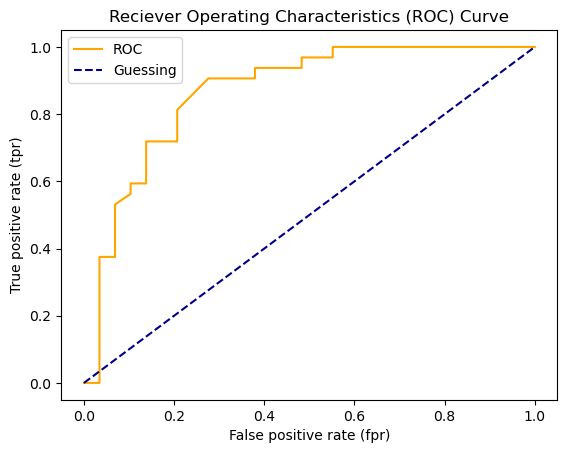

In [111]:
# Create function for plotting ROC curves

import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """"
    Plots a ROC given the false positive rate(fpr) and true positive rate (tpr) of a model 
    """
    # Plot roc 
    plt.plot(fpr,tpr, color ="orange", label= "ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")

    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Reciever Operating Characteristics (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [112]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

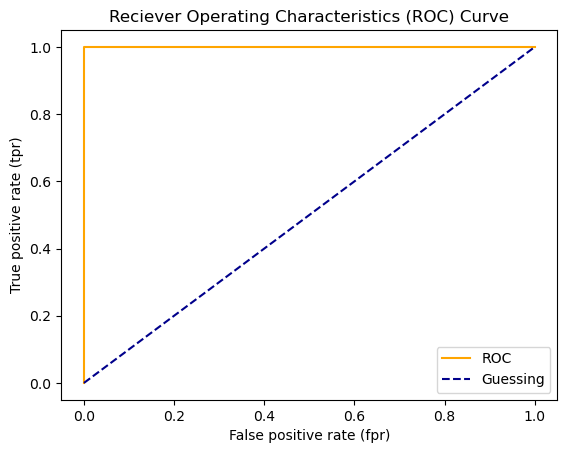

In [113]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [114]:
# Perfect AUC score 
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.

In [115]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [116]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Label"],
           colnames=["Predicted Labels"])


Predicted Labels,0,1
Actual Label,,
0,23,6
1,6,26


In [117]:
22+ 7 + 8 + 24

61

In [118]:
len(y_preds)

61

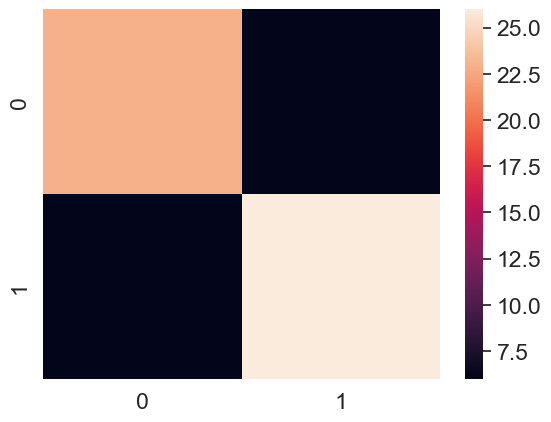

In [119]:
# make our confusion matrix more visual with Seaborn's heatmap()

import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

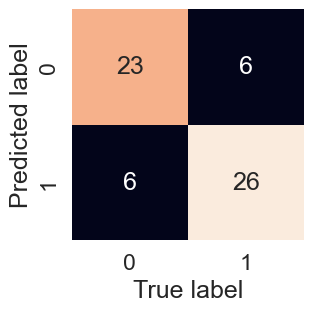

In [120]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                    annot =True, #Annote the boxes with conf_mat info
                    cbar =False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(conf_mat)
    

In [121]:
#from sklearn.metrics import plot_confusion_matrix

#plot_confusion_matrix(clf,X,y)
# Does not work but seaborn library and panda crosstab can be used 

**Classification Report**

In [122]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [123]:
# Where precision and recall becomes valuable
disease_true = np.zeros(10000)
disease_true[0]=1 # only one positive case

disease_preds = np.zeros(10000)


pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))

C:\Users\Esther Jokodola\anaconda3\envs\tensorflows\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Esther Jokodola\anaconda3\envs\tensorflows\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Esther Jokodola\anaconda3\envs\tensorflows\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics:

* **Accuracy** is a good measure to start with if all classes are balanced(eg. same amount of samples which are labelled with 0 or 1).
* **Precision** and **recall** become more important when classes are imbalanced.
* If false positive prediction are worse than false negatives, aim for higher precision.
 * If false negative predictions are worse than false positives, aim for higher recall.
* **F1-score** is a combination of precision and recall

### 4.2.2 Regression model evaluation metrics

1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)


**R^2**

What R-squared does: Compares your models prediction to the mean of the targets. Values can range from negative infinity ( a very poor model) to 1. if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers its R^2 value would be 1.

In [124]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = california_df.drop("target", axis=1)
y=  california_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [125]:
model.score(X_test, y_test)

0.8065734772187598

In [126]:
from sklearn.metrics import r2_score
    
# Fill an array with y_test mean
y_test_mean = np.full(len(y_test),y_test.mean())

In [127]:
y_test.mean()

2.0550030959302323

In [128]:
r2_score(y_test,y_test_mean)

0.0

In [129]:
r2_score(y_test,y_test)

1.0

**Mean absolute error(MAE)**

MAE is the average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions are.

In [130]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.32659871732073664

In [131]:
df = pd.DataFrame(data={"actual values": y_test,
                       "predicted values": y_preds})
df

,actual values,predicted values
20046,0.47700,0.493840
3024,0.45800,0.754940
15663,5.00001,4.928596
20484,2.18600,2.543160
9814,2.78000,2.331760
...,...,...
15362,2.63300,2.220380
16623,2.66800,1.947760
18086,5.00001,4.836378
2144,0.72300,0.717820


In [132]:
df["differences"]= df["predicted values"] - df["actual values"]
df

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
...,...,...,...
15362,2.63300,2.220380,-0.412620
16623,2.66800,1.947760,-0.720240
18086,5.00001,4.836378,-0.163632
2144,0.72300,0.717820,-0.005180


**Mean squared error(MSE)**

In [133]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2534678520824551

In [134]:
# Calculate MSE by hand
squared = np.square(df["differences"])
squared.mean()

0.2534678520824551

### 4.23 Finally using the `scoring` parameter


In [135]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


np.random.seed(42)
X = heart_disease.drop("target", axis=1)
y= heart_disease["target"]

clf = RandomForestClassifier()

In [136]:
np.random.seed(42)
cv_acc = cross_val_score(clf,X,y, cv=5, scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [137]:
# Cross-validated accuracy
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is: 82.48%


In [138]:
np.random.seed(42)
cv_acc = cross_val_score(clf,X,y, cv=5, scoring="accuracy")
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is: 82.48%


In [139]:
# Precision
cv_precision = cross_val_score(clf, X,y, cv=5, scoring="precision")
np.mean(cv_precision)

0.8085601538512754

In [140]:
# Recall
cv_recall = cross_val_score(clf,X,y,cv=5, scoring="recall")
np.mean(cv_recall)

0.8424242424242424

In [141]:
cv_f1 = cross_val_score(clf, X,y, cv=5, scoring="f1")
np.mean(cv_f1)

0.841476533416832

How about our regression model?

In [142]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor


np.random.seed(42)
X = california_df.drop("target", axis=1)
y= california_df["target"]

model = RandomForestRegressor(n_estimators=100)


In [143]:
np.random.seed(42)
cv_r2 = cross_val_score(model,X,y, cv=5, scoring=None)
cv_r2 #np.mean(cv.r2)

array([0.51682388, 0.70279716, 0.74197717, 0.61638204, 0.68243183])

In [144]:
np.random.seed(42)
cv_r2 = cross_val_score(model,X,y, cv=5, scoring="r2")
cv_r2

array([0.51682388, 0.70279716, 0.74197717, 0.61638204, 0.68243183])

In [145]:
 # Mean absolute error
# cv_mae = cross_val_score(X, y, cv=5, scoring="neg_mean_absolute_error")
# cv_mae

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Assuming california_df is already defined and contains the data
np.random.seed(42)

# Splitting features and target
X = california_df.drop("target", axis=1)
y = california_df["target"]

# Initialize the model
model = RandomForestRegressor(n_estimators=100)

# Perform cross-validation using mean absolute error
cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
print(cv_mae)


[-0.54256026 -0.40902123 -0.43706982 -0.46918522 -0.47318856]


In [146]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Assuming california_df is already defined and contains the data
np.random.seed(42)

# Splitting features and target
X = california_df.drop("target", axis=1)
y = california_df["target"]

# Initialize the model
model = RandomForestRegressor(n_estimators=100)

# Perform cross-validation using mean squared error
cv_mse = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
print(cv_mse)

[-0.51906271 -0.34789469 -0.37117373 -0.4500546  -0.46274716]


### 4.3 Using different evaluation metrics as Scikit-Learn functions

**Classification evaluation functions**

In [147]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y= heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf= RandomForestClassifier()
clf.fit(X_train, y_train)

# Make some predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


**Regression evaluation functions**``

In [148]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = california_df.drop("target", axis=1)
y = california_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model =RandomForestRegressor()
model.fit(X_train,y_train)

# Make predicts using our regression model
y_preds = model.predict(X_test)

# Evaluate the regression model
print("Regression model metrics on the test set ")
print(f"R^2: {r2_score(y_test,y_preds)}")
print(f"MAE: {mean_absolute_error(y_test,y_preds)}")
print(f"MSE: {mean_squared_error(y_test,y_preds)}")

Regression model metrics on the test set 
R^2: 0.8065734772187598
MAE: 0.32659871732073664
MSE: 0.2534678520824551


In [149]:
what

NameError: name 'what' is not defined